
### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Cargo de datos

In [2]:
rutaArchivo = "C:/Users/Jsant/Mall_Customers-2.csv"
df = pd.read_csv(rutaArchivo, index_col =0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
#Analisis descriptivo
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [4]:
df.rename({'Annual Income (k$)':'Ingreso', 'Spending Score (1-100)':'Ponderacion'}, axis=1, inplace=True)
df.head()

,Gender,Age,Ingreso,Ponderacion
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [5]:
#Distribucion de cada clase
df.groupby('Gender').size()

Gender
Female    112
Male       88
dtype: int64

### Formacion de grupos de entrenamiento y pruebas 

In [6]:
#Separacion de datos
train, test = train_test_split(df, test_size = 0.4, stratify = df['Gender'], random_state=42)
train.head(5)

,Gender,Age,Ingreso,Ponderacion
CustomerID,,,,
39,Female,36,37,26
55,Female,50,43,45
93,Male,48,60,49
183,Male,46,98,15
143,Female,28,76,40


## Analisis exploratorio

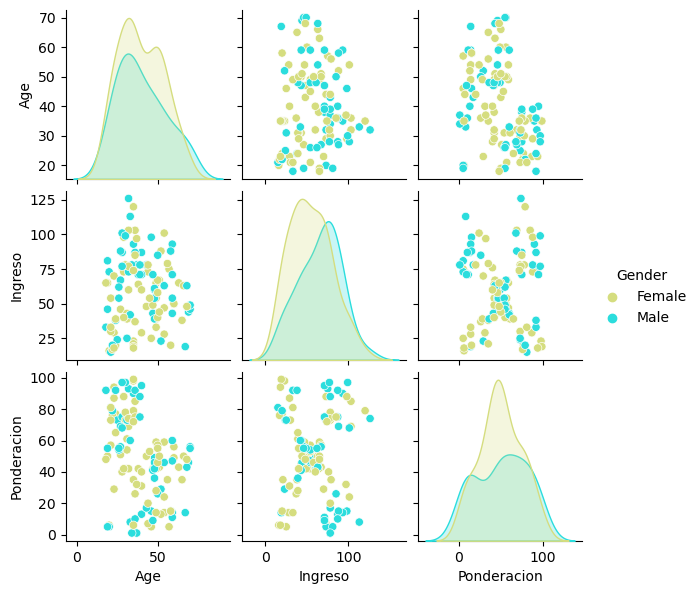

In [7]:
#Diagrama de dispersion de los atributos emparejados
sns.pairplot(train, hue='Gender', height=2, palette='rainbow_r');

### Separacion de la etiqueta de clase y atributos

In [8]:
#Seperacion objetivo - explicativas de cada grupo
#grupo entrenamiento
X_train = train[['Age', 'Ingreso', 'Ponderacion']]
y_train =  train['Gender']
#grupo de pruebas
X_test = test[['Age', 'Ingreso', 'Ponderacion']]
y_test =  test['Gender']
#Mostrar los primeros valores
print(X_train.head(5))
print(y_train.head(5))

            Age  Ingreso  Ponderacion
CustomerID                           
39           36       37           26
55           50       43           45
93           48       60           49
183          46       98           15
143          28       76           40
CustomerID
39     Female
55     Female
93       Male
183      Male
143    Female
Name: Gender, dtype: object


### Arbol de decision (clasificacion)

In [9]:
#Creacion del odelo del arbol de decision
mod_dt = DecisionTreeClassifier(max_depth=3, random_state=1)
mod_dt.fit(X_train, y_train)
prediccion = mod_dt.predict(X_test)

In [10]:
#Modulos para metricas de eficiencia del modelo
from sklearn import metrics

In [11]:
#Verificacion de la presicion del arbol 
print('La precision del arbol de decision es: {:.3f}'.format(metrics.accuracy_score(prediccion, y_test)))

La precision del arbol de decision es: 0.537


In [12]:
#importancia
mod_dt.feature_importances_

array([0.21167935, 0.27479957, 0.51352108])

In [13]:
mod_dt.feature_names_in_

array(['Age', 'Ingreso', 'Ponderacion'], dtype=object)

In [14]:
importancia_dt = pd.DataFrame({'Caracteristica': mod_dt.feature_names_in_, 
                              'Importancia':mod_dt.feature_importances_})
importancia_dt

,Caracteristica,Importancia
0,Age,0.211679
1,Ingreso,0.274800
2,Ponderacion,0.513521


### Visualizacion del arbol de decision

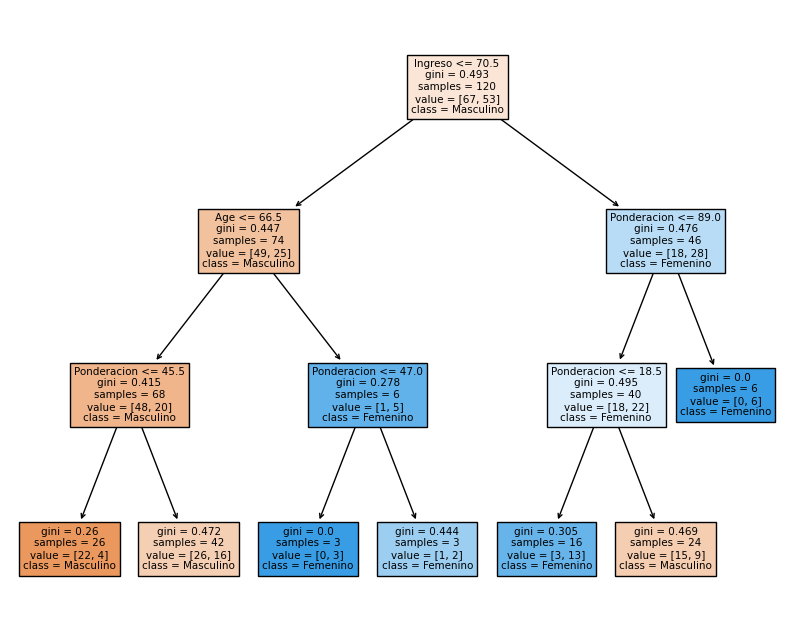

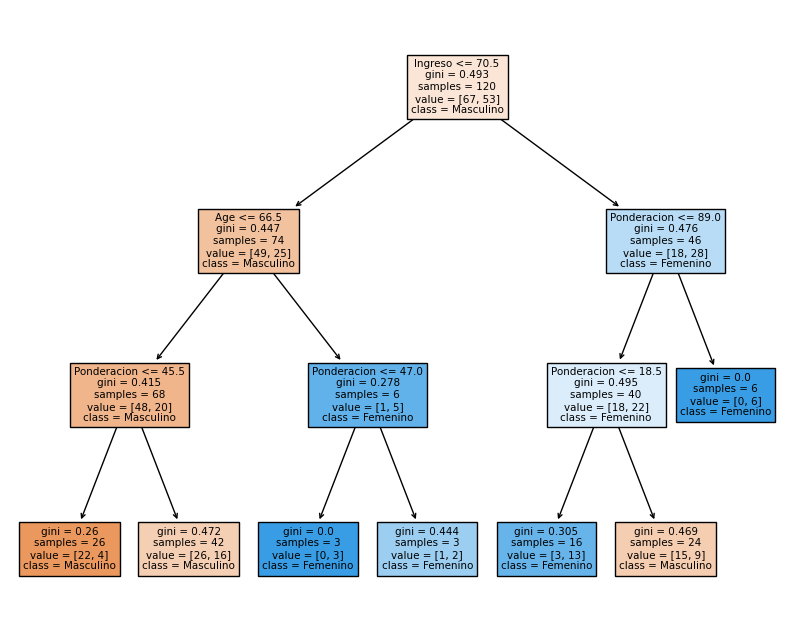

In [18]:
plt.figure(figsize=(10,8))
plot_tree(mod_dt, feature_names=mod_dt.feature_names_in_,
         class_names=['Masculino','Femenino'], filled=True)
plt.show();